# Computer Vision - P2

## Delivery

Up to **1 point out of 10** will be penalized if the following requirements are not fulfilled:

- Implemented code should be commented.

- The questions introduced in the exercises must be answered.

- Comments need to be in **english**.

- The deliverable must be a file named **P2_Student1_Student2.zip** that includes:
    - The notebook P2_Student1_Student2.ipynb completed with the solutions to the exercises and their corresponding comments.
    - All the images used in this notebook.

**Deadline (Campus Virtual): October 24th, 23:00 h** 

==============================================================================================
## Practicum 2: Filtering and edge detection

==============================================================================================

The main topics are:
1. Image smoothing and convolution (exercises 2.1, 2.2, 2.3 and 2.4)
2. Edge detection (exercises 2.5, 2.6 and 2.7)

In order to complete this practicum, the following concepts need to be understood: linear filters, histograms, convolutions, and edges.

The following chapters of the book "Computer Vision: Algorithms and Applications" by Richard Szeliski provide additional information:
* Chapter 3. Image processing: Point operators & linear filtering.
* Chapter 4. Feature detection and matching: Edges.

In [1]:
import numpy as np # Useful for manipulating matrices
from skimage import io # Useful for image loading and saving
from matplotlib import pyplot as plt # Useful for plotting images on iPython or Jupyter Notebooks

from skimage import exposure # To get histogram of images
from skimage import img_as_float # Pass to float an image
from skimage.color import rgb2gray # Pass to gray an rgb image
from skimage.transform import rescale # To rescale images
from skimage.color import rgba2rgb # To convert RGBA image to RGB
from scipy import ndimage # To use the convolve function 
from skimage.transform import resize # To resize images

from skimage import filters # To use filters like Gaussian, Roberts, etc...
from skimage.util import random_noise # To add noise 
from skimage import feature # To apply Canny

from skimage.color.adapt_rgb import adapt_rgb, each_channel # To apply Gaussian on RGB images
%matplotlib inline

@adapt_rgb(each_channel) # Decorator from Scikit Image to process rgb images on filtering
def gaussian_each(image, sigma): # Pass each of the RGB channels to the filter one-by-one, and stitch the results back into an RGB image.
    return filters.gaussian(image, sigma)

### 2.1 RGB histogram visualization

a) Read the image `./images_notebook/rocki.jpeg` and visualize the RGB image as well as each of its channels separately (R, G, and B). Print the image shape and data type.

<img src="images_notebook/rocki.jpeg" width="400" height="400">

**Note:** Before applying the histogram, you should pass the image into float.

In [29]:
#your solution
# reading rocki image
rocki_img = io.imread('images_notebook/rocki.jpeg')
# now we grab rgb channels separately
cr = rocki_img[:,:,0] #red channel
cg = rocki_img[:,:,1] #green channel
cb = rocki_img[:,:,2] #blue channel

# show the original image and each of its channels
fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,4,1)
plt.imshow(rocki_img)
ax.title.set_text("Original Image")
# printing some info of the image
print("Original photo shape ", rocki_img.shape, "dtype ", rocki_img.dtype)

ax = fig.add_subplot(1,4,2)
plt.imshow(cr,cmap="gray")
ax.title.set_text("Red Channel")
# printing some info of the image
print("Red channel shape ", cr.shape, " Red channel dtype ", cr.dtype)

ax= fig.add_subplot(1,4,3)
plt.imshow(cg,cmap="gray")
ax.title.set_text("Green Channel")
# printing some info of the image
print("Green channel shape ", cg.shape, " Green channel dtype ", cg.dtype)

ax= fig.add_subplot(1,4,4)
plt.imshow(cg,cmap="gray")
ax.title.set_text("Blue Channel")
# printing some info of the image
print("Blue channel shape ", cg.shape, "Blue channel dtype ", cg.dtype)

# final we transform image values into float
rocki_float = img_as_float(rocki_img)

<IPython.core.display.Javascript object>

Original photo shape  (1024, 768, 3) dtype  uint8
Red channel shape  (1024, 768)  Red channel dtype  uint8
Green channel shape  (1024, 768)  Green channel dtype  uint8
Blue channel shape  (1024, 768) Blue channel dtype  uint8


b) Make a function `im_hist(im,  nbins=8)` to visualize the histogram of the RGB, and grayscale images. What is the histogram representing for an image? 

The plotted histogram must accomplish these requirements (see image bellow as an example of histogram extraction):

- Obtain the histogram with 16, 32, 64 and 256 bins. What are the bins representing?

- Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.

**Note:** What type should be the image in order to compute the histogram? Check using different bins for the histogram. 

**Hint** : the `exposure` module within the `skimage` library makes the histogram extraction easy!

**Help:** [matplotlib image tutorial](https://matplotlib.org/users/image_tutorial.html)

<img src='images_notebook/histograms.png'>

<img src='images_notebook/histograms2.png'>

<img src='images_notebook/histograms3.png'>

In [30]:
#your solution
def im_hist(im,  nbins=8) :
    #your solution

    #we pass the image to grayscale
    gray_img = rgb2gray(im)
    
    # now we grab rgb channels of original image separately
    r_img = im[:,:,0] #red channel
    g_img = im[:,:,2]  #green channel
    b_img = im[:,:,1]  #blue channel
   

    # we pass all images to float
    gray_img = img_as_float(gray_img)
    r_img = img_as_float(r_img)    
    g_img = img_as_float(g_img)
    b_img = img_as_float(b_img)    
    
    # creating histoghram of every image
    hist_gray = exposure.histogram(gray_img, nbins)
    hist_r = exposure.histogram(r_img, nbins)
    hist_g = exposure.histogram(g_img, nbins)
    hist_b = exposure.histogram(b_img, nbins)

    # show all images
    fig, ax = plt.subplots(ncols = 1, figsize = (20, 5))
    width = 0.2 # set width of bins
    
    bins_gray = np.arange(0, nbins) 
    bins_r = bins_gray + width
    bins_g = bins_gray + width * 2 
    bins_b = bins_gray + width * 3 

    # show histograms
    # i made the column gray because I think it's better to see the information clearer, 
    # but if you want to see it in yellow as the examble just comment this line an uncomment the one after this
    ax.bar(bins_gray, hist_gray[0], width=0.2, color='gray') 
    # ax.bar(bins_gray, hist_gray[0], width=0.2, color='y') 
    ax.bar(bins_r, hist_r[0], width=0.2, color='red')
    ax.bar(bins_g, hist_g[0], width=0.2, color='green')
    ax.bar(bins_b, hist_b[0], width=0.2, color='blue')
    
    # setting title of each histogram
    ax.set_title('Histogram with ' + str(nbins) + ' bins')
    
    # we add a legend so it's easy to see which variable is which
    ax.legend(['Gray','Red', 'Green', 'Blue'])
    
    fig.tight_layout()
    
    plt.show()


im_hist(rocki_img, 8)
im_hist(rocki_img, 16)
im_hist(rocki_img, 32)
im_hist(rocki_img, 64)
im_hist(rocki_img, 256)



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

>**QUESTION: What are the bins representing?** </p>
Histograms are made up of bins, each bin representing a certain
intensity value range. The histogram is computed by examining all pixels
in the image and assigning each to a bin depending on the pixel intensity.
The final value of a bin is the number of pixels assigned to it.

>**Visualize the histogram of each channel and the gray level image separately and compare them. Comment their differences.**</p>
Both RGB and intensity histograms contain the same basic information, distribution of values. 
The difference lies in what the values represent. In an intensity histogram, the values represent the intensity 
values in a grayscale image (typically 0 to 255). In an RGB histogram, divided into individual R, G, B histograms, 
each colour channel is just a graph of the frequencies of each of the RGB component values of each pixel.


>**What type should be the image in order to compute the histogram?**</p>
Float

### 2.2 Grayscale and RGB images filtering (convolutions)

a) Read the image `./images_exam/rocki.jpeg`. Reshape the image to $256x256$ pixels and convert to gray scale (i.e. `rocki_gray`). We are going to apply:

1. Convolve `rocki_gray` with a horizontal mask `mask_h1d=[[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]` using the function `ndimage.convolve()` of the package `scipy`.
2. Convolve `rocki_gray` with a transposed version of the mask in (2).
3. Convolve `rocki_gray` with a uniform `two-dimensional` mask of dimensions 15x15 with all values set to 1.

Check the maximum and minimum values, as well as the data type of each imagea.

- Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.


**Note:** The command `convolve` performs a multidimensional convolution! A vector should be represented as: [[1,...1]].

**Note:** Remember that before applying the `convolve` function the mask must be normalized (i.e. all values in the mask must sum 1).


In [31]:
#your solution
from scipy import ndimage 

# we already loaded the rocki image so we don't have to do it again
# now we convert it to grayscale
rocki_gray_img = rgb2gray(rocki_img)

# declaring the horizontal mask mentioned in the exercice
mask_h1d = [[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]
# normalize it dividing mask by the sum of all its values
mask_h1d = mask_h1d / np.sum(mask_h1d)
# apply the mask to the grayscale image using standard parameters
rocki_h1d = ndimage.convolve(rocki_gray_img, mask_h1d, mode='constant', cval=0.0)

# transposing horizontal mask, it's vertical now
mask_h1d_transposed = mask_h1d.transpose()
# apply the mask to the grayscale image using standard parameters
rocki_h1d_t = ndimage.convolve(rocki_gray_img, mask_h1d_transposed, mode='constant', cval=0.0)

# creating a two-dimensional uniform mask with a np.zeros array of 15x15
mask_h2d = np.zeros((15,15), dtype = np.uint8)
# setting all values to 1
mask_h2d[:,:] = 1
# normalize it dividing mask by the sum of all its values
mask_h2d = mask_h2d / np.sum(mask_h2d)
# apply the mask to the grayscale image using standard parameters
rocki_h2d = ndimage.convolve(rocki_gray_img, mask_h2d, mode='constant', cval=0.0)

# printing some info
print(
    'Original image:', '\n',
    'minimum: ', rocki_img.max(), '\n',
    'maximum: ', rocki_img.min(), '\n',
    'dtype: ', rocki_img.dtype, '\n','\n',

    'Grayscale image:', '\n',
    'minimum: ', rocki_gray_img.min(), '\n',
    'maximum: ', rocki_gray_img.max(), '\n',
    'dtype: ', rocki_gray_img.dtype, '\n','\n',

    'Grayscale image after convolving it with the one-dimensional horizontal mask:' '\n',
    'minimum: ', rocki_h1d.min(), '\n',
    'maximum: ', rocki_h1d.max(), '\n',
    'dtype: ', rocki_h1d.dtype, '\n','\n',

    'Grayscale image after convolving it with the one-dimensional transposed:', '\n',
    'minimum: ', rocki_h1d_t.min(), '\n',
    'maximum: ', rocki_h1d_t.max(), '\n',
    'dtype: ', rocki_h1d_t.dtype, '\n','\n',

    'Grayscale image after convolving it with the two-dimensional mask:', '\n',
    'minimum: ', rocki_h2d.min(), '\n',
    'maximum: ', rocki_h2d.max(), '\n',
    'dtype: ', rocki_h2d.dtype, '\n','\n')


Original image: 
 minimum:  255 
 maximum:  0 
 dtype:  uint8 
 
 Grayscale image: 
 minimum:  0.0 
 maximum:  1.0 
 dtype:  float64 
 
 Grayscale image after convolving it with the one-dimensional horizontal mask:
 minimum:  0.014315320261437907 
 maximum:  0.9989444444444446 
 dtype:  float64 
 
 Grayscale image after convolving it with the one-dimensional transposed: 
 minimum:  0.024033830065359477 
 maximum:  0.9981898300653597 
 dtype:  float64 
 
 Grayscale image after convolving it with the two-dimensional mask: 
 minimum:  0.05389229978213503 
 maximum:  0.9963542274509808 
 dtype:  float64 
 



b) Visualize the four images, `rocki_gray` and the output of each step (1 to 3) in a single figure, with the corresponding titles.


Note: Remember that `matplotlib.pyplot` automatically rescales the values of the image before displaying them. Visualize with and without pixel values range rescaling.


In [32]:
#your solution

# we show all images created with the masks
fig = plt.figure(figsize=(15,15))

fig.add_subplot(1,4,1)
plt.title('Grayscale')
plt.imshow(rocki_gray_img, cmap="gray")

fig.add_subplot(1,4,2)
plt.title('One-dimensional mask')
plt.imshow(rocki_h1d, cmap="gray")

fig.add_subplot(1,4,3)
plt.title('One-dimensional transposed mask')
plt.imshow(rocki_h1d_t, cmap="gray")

fig.add_subplot(1,4,4)
plt.title('Two-dimensional mask')
plt.imshow(rocki_h2d, cmap="gray")

<IPython.core.display.Javascript object>

c) Can we convolve a color (RGB) image? 

Implement a function `conv_coor(image, mask)` that applies a 3-channel filter.  Reshape the original `rocki.png` image to $256x256$ pixels and try your funcion, using a 15x15 uniform mask.


Rocky image Original (1024, 768, 3)
Rocky image rgb covolved (256, 256, 3)


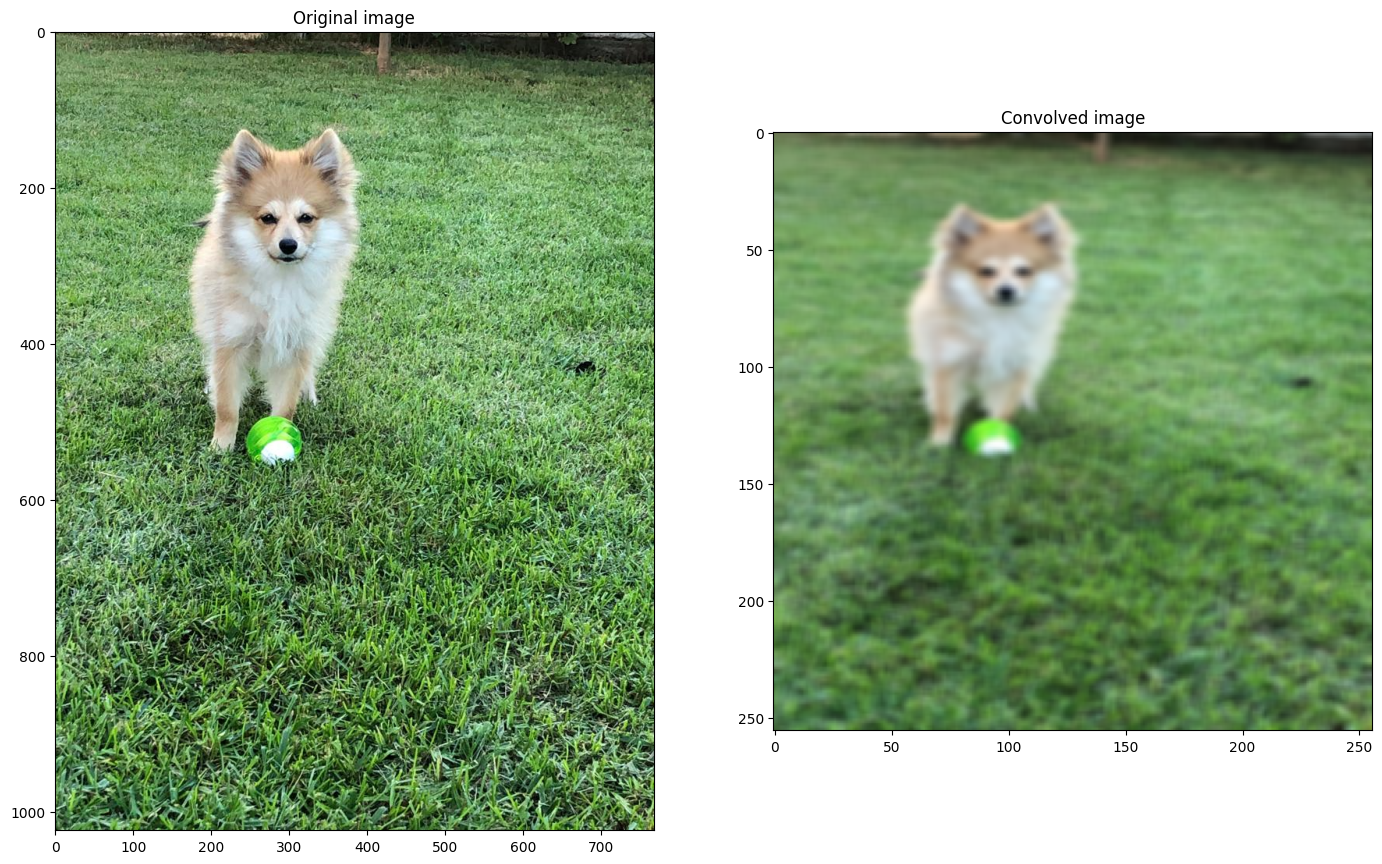

In [10]:
#your solution
from skimage import color
#your solution
def conv_coor(image, mask):
    # create copy of original image to work with
    image_convolve = np.copy(image)
    # convolve each channel separately
    image_convolve[:,:,0] = ndimage.convolve(image[:,:,0], mask) 
    image_convolve[:,:,1] = ndimage.convolve(image[:,:,1], mask) 
    image_convolve[:,:,2] = ndimage.convolve(image[:,:,2], mask) 
    #reshaping image
    image_convolve = resize(image_convolve,(256,256))
    return image_convolve

# we set the mask we are going to use
mask = np.ones((15,15))
mask_sum = np.sum(mask)
mask = mask / mask_sum

# we show the images and their shapes
fig = plt.figure(figsize=(17,17))
# creating the convolved and reshaped image
rocki_rgb_convolved = conv_coor(rocki_img, mask)

fig.add_subplot(1,2,1)
plt.imshow(rocki_img, cmap = 'gray')
plt.title('Original image')
print('Rocky image Original', rocki_img.shape)

fig.add_subplot(1,2,2)
plt.imshow(rocki_rgb_convolved, cmap = 'gray')
plt.title('Convolved image')
print('Rocky image rgb covolved', rocki_rgb_convolved.shape)

plt.show()

>**Question: Is the type of the mask important for the convolution? What effect does each of the masks produce on the original image? Compare the results.**</p>
Yes, size is directly proportional to mask effect. This means that the bigger size of mask we have, the smother final image we obtain

### 2.3 Effect of image scale on convolutions

a) Resize an image and observe the variations in the histograms.

1. Reduce `rocki_gray` 10 times, and check the histogram (i.e. nbins = 32)
2. Augment `rocki_gray` 10 times, and check its histogram (i.e. nbins = 32)

- Is there any difference? Please, comment what happens and why.
    - Yes, there will be differences in the histograms after resizing:
    Reduction leads to a more smoothed histogram because of averaging, which causes a potential loss of details.
    Augmentation might not significantly alter the histogram's shape but could introduce minor variations.

c:\Python311\Lib\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


<BarContainer object of 32 artists>

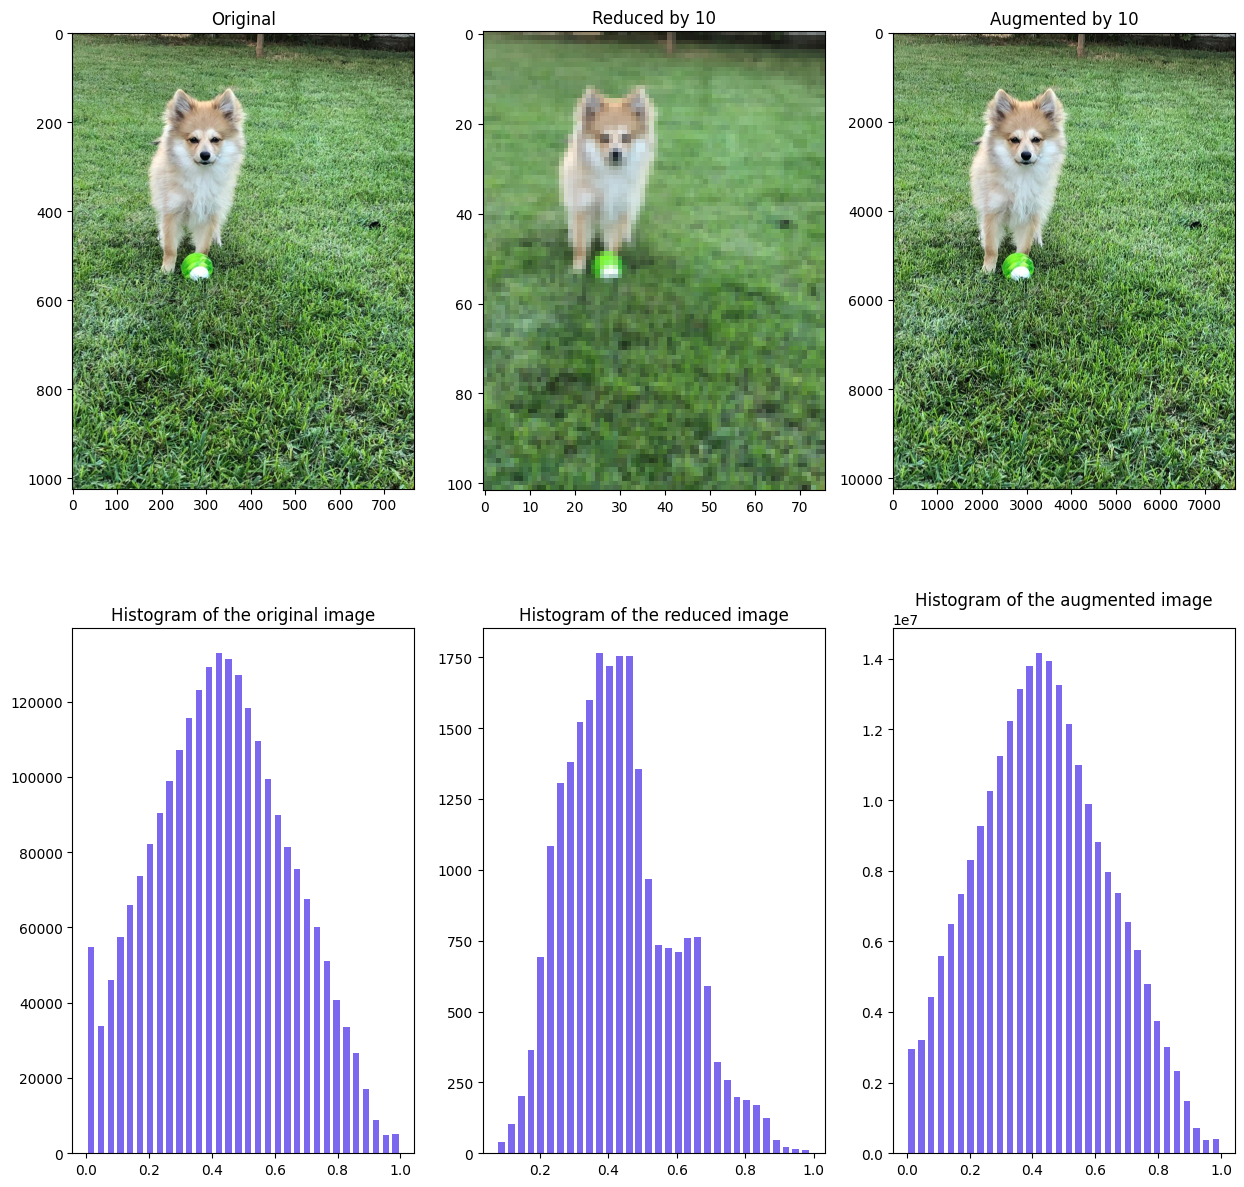

In [11]:
#your solution

# we first obtain the reduced and augmented image of rocki
rocki_reduced = resize(rocki_img, (rocki_img.shape[0]//10, rocki_img.shape[1]//10))
rocki_augmented = resize(rocki_img, (rocki_img.shape[0]*10, rocki_img.shape[1]*10))

# making the 3 histograms with 32 bins each we have to make sure that values are float
original_hist = exposure.histogram(img_as_float(rocki_img), nbins = 32)
reduced_hist = exposure.histogram(img_as_float(rocki_reduced), nbins = 32)
augmented_hist = exposure.histogram(img_as_float(rocki_augmented), nbins = 32)

# showing original, reduced and  augmented images of rocki
fig = plt.figure(figsize=(15,15))

fig.add_subplot(2,3,1)
plt.title('Original')
plt.imshow(rocki_img, cmap = 'gray')

fig.add_subplot(2,3,2)
plt.title('Reduced by 10')
plt.imshow(rocki_reduced, cmap = 'gray')

fig.add_subplot(2,3,3)
plt.title('Augmented by 10')
plt.imshow(rocki_augmented, cmap = 'gray')

fig.add_subplot(2,3,4)
plt.title('Histogram of the original image')
plt.bar(original_hist[1], original_hist[0], width = 0.02, color = 'mediumslateblue')

fig.add_subplot(2,3,5)
plt.title('Histogram of the reduced image')
plt.bar(reduced_hist[1], reduced_hist[0], width = 0.02, color = 'mediumslateblue')

fig.add_subplot(2,3,6)
plt.title('Histogram of the augmented image')
plt.bar(augmented_hist[1], augmented_hist[0], width = 0.02, color = 'mediumslateblue')

b) Apply a convolution (15x15 uniform mask) on the resized images, calculate the histograms and compare the results.

1. Convolve the original `rocki_gray`image and calculate its histogram.
2. Convolve the reduced `rocki_gray` image 10 times and calculate its histogram.
3. Convolve the augmented `rocki_gray` image 10 times and calculate its histogram.

Comment what happens and why.
- Convolution with a uniform mask is a low-pass filter operation, which smoothens the image by averaging pixel values in a local neighborhood. When applied multiple times, this process compounds, leading to increased blurring. As the image gets smoother, its histogram becomes more concentrated because there are fewer variations in pixel intensities.

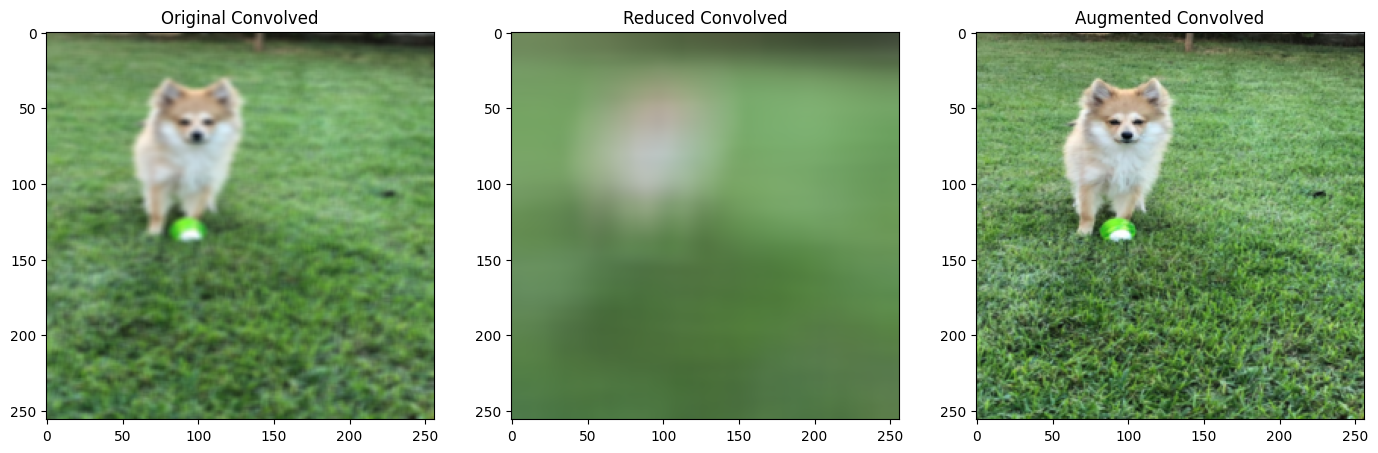

In [12]:
#your solution

#generating mask
mask = np.ones((15,15))
mask_sum = np.sum(mask)
mask = mask / mask_sum

#convolving images
rocki_convolve = conv_coor(rocki_img, mask)
rocki_reduced_convolve = conv_coor(rocki_reduced, mask)
rocki_augmented_convolve = conv_coor(rocki_augmented, mask)

#showing images
fig = plt.figure(figsize = (17,17))

fig.add_subplot(1,3,1)
plt.title('Original Convolved')
plt.imshow(rocki_convolve, cmap='gray')

fig.add_subplot(1,3,2)
plt.title('Reduced Convolved')
plt.imshow(rocki_reduced_convolve, cmap='gray')

fig.add_subplot(1,3,3)
plt.title('Augmented Convolved')
plt.imshow(rocki_augmented_convolve, cmap='gray')
plt.show()

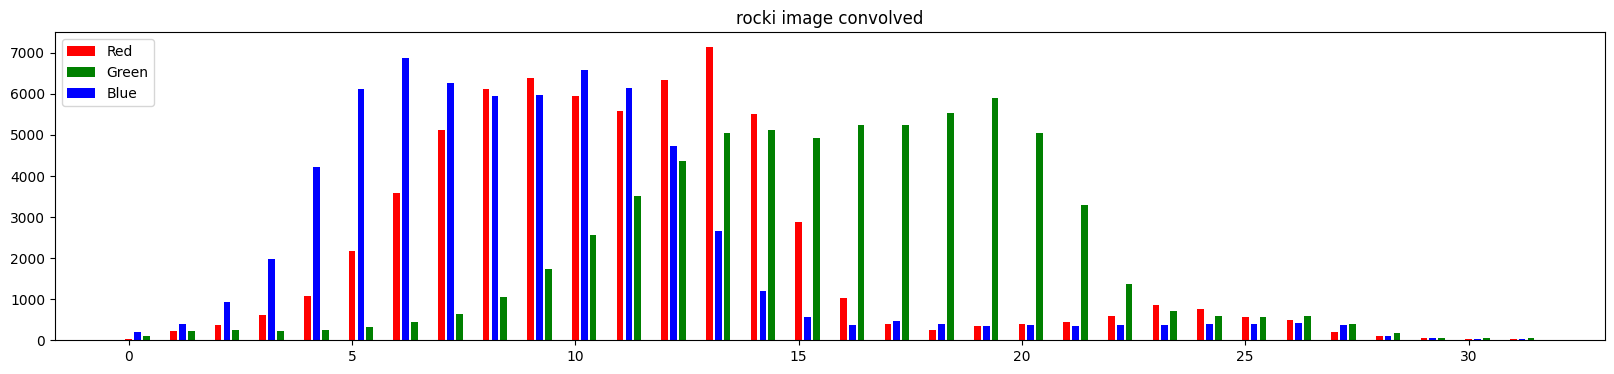

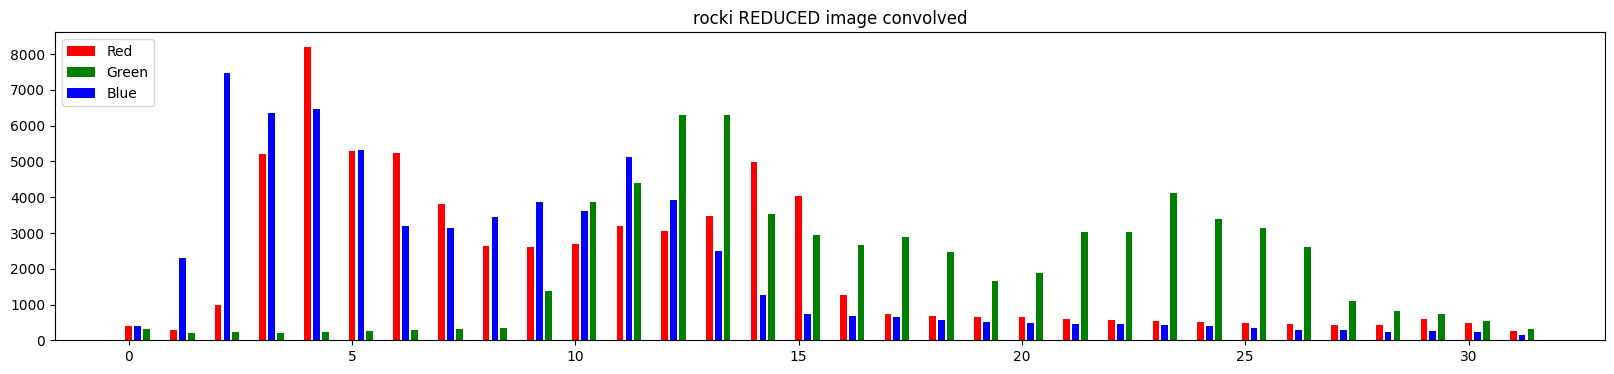

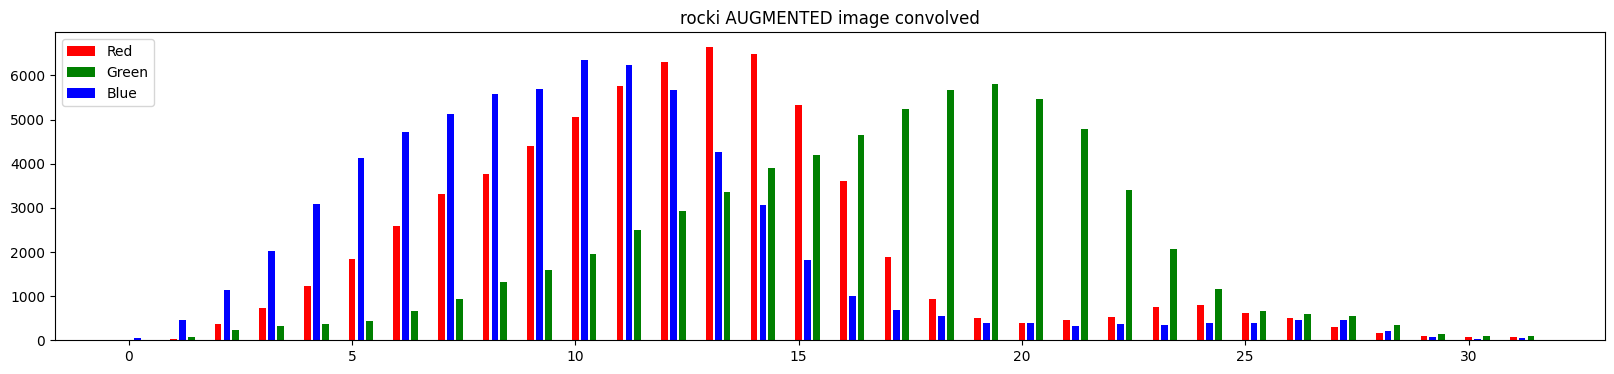

In [13]:
from turtle import width

number_of_bins = 32
width_bins = 0.15

# histogram of 3 channels rgb separately of rocki image
hst_r, bins_r = exposure.histogram(img_as_float(rocki_convolve[:,:,0]), nbins = number_of_bins)
hst_g, bins_g = exposure.histogram(img_as_float(rocki_convolve[:,:,1]), nbins = number_of_bins)
hst_b, bins_b = exposure.histogram(img_as_float(rocki_convolve[:,:,2]), nbins = number_of_bins)
ind = np.arange( number_of_bins)

# showing the histogram of rocki image
fig = plt.figure(figsize = (20,4))
cl_r = plt.bar(ind, hst_r, color = 'r', width = width_bins)
cl_g = plt.bar(ind+.4, hst_g, color = 'g', width = width_bins)
cl_b = plt.bar(ind+.2, hst_b, color = 'b', width = width_bins)
plt.legend((cl_r[0], cl_g[0], cl_b[0]), ('Red','Green','Blue'), loc=2)
plt.title('rocki image convolved')
plt.show()

# histogram of 3 channels rgb separately of rocki REDUCED image
hst_r, bins_r = exposure.histogram(img_as_float(rocki_reduced_convolve[:,:,0]), nbins = number_of_bins)
hst_g, bins_g = exposure.histogram(img_as_float(rocki_reduced_convolve[:,:,1]), nbins = number_of_bins)
hst_b, bins_b = exposure.histogram(img_as_float(rocki_reduced_convolve[:,:,2]), nbins = number_of_bins)
ind = np.arange(number_of_bins)

# showing the histogram of rocki REDUCED image
fig = plt.figure(figsize = (20,4))
cl_r = plt.bar( ind, hst_r, color = 'r', width = width_bins)
cl_g = plt.bar( ind+.4, hst_g, color = 'g', width = width_bins)
cl_b = plt.bar( ind+.2, hst_b, color = 'b', width = width_bins)
plt.legend((cl_r[0], cl_g[0], cl_b[0]), ('Red','Green','Blue'), loc=2)
plt.title('rocki REDUCED image convolved')
plt.show()

# histogram of 3 channels rgb separately of rocki AUGMENTED image
hst_r, bins_r = exposure.histogram(img_as_float(rocki_augmented_convolve[:,:,0]), nbins = number_of_bins)
hst_g, bins_g = exposure.histogram(img_as_float(rocki_augmented_convolve[:,:,1]), nbins = number_of_bins)
hst_b, bins_b = exposure.histogram(img_as_float(rocki_augmented_convolve[:,:,2]), nbins = number_of_bins)
ind = np.arange(number_of_bins)

# showing the histogram of rocki AUGMENTED image
fig = plt.figure(figsize = (20,4))
cl_r = plt.bar( ind, hst_r, color='r', width = width_bins)
cl_g = plt.bar( ind+.4, hst_g, color='g', width = width_bins)
cl_b = plt.bar( ind+.2, hst_b, color='b', width = width_bins)
plt.legend((cl_r[0], cl_g[0], cl_b[0]), ('Red','Green','Blue'), loc=2)
plt.title('rocki AUGMENTED image convolved')
plt.show()

### 2.4 Image processing with weighting and non-linear filters

a) Generate the following kernels and apply them to the `rocki_gray` image:

1. Gaussian kernel with sigma = 1
2. Gaussian kernel with a different sigma value. Which is the most adequate value for keeping the main objects and structures of the image?
3. Median filter.

Comment the effect of using different kinds of filters on the original image.

**Hint:** Search for the [skimage.filters function](https://scikit-image.org/docs/stable/api/skimage.filters.html) for creating the different filters.

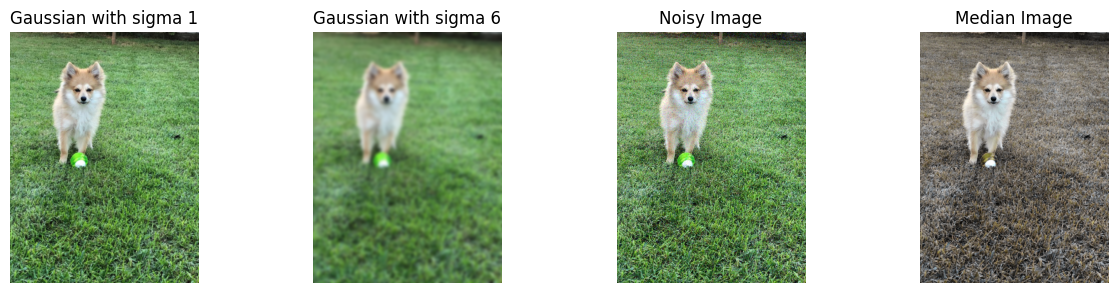

In [14]:
#your solution
# apply Gaussian filter function from sckit-image with sigma 1
rocki_gaussian = np.copy(rocki_img)
rocki_gaussian = gaussian_each(rocki_gaussian, 1)

# apply another Gaussian filter but now with sigma 6
rocki_gaussian_diff = np.copy(rocki_img)
rocki_gaussian_diff = gaussian_each(rocki_gaussian_diff, 6)

# createing noisy image from the original one
noisy = random_noise(rocki_img, mode='s&p')
median = np.copy(noisy)
filters.median(noisy, out = median)

# showing the four images
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(4 ,4,1)
ax.title.set_text('Gaussian with sigma 1')
plt.axis('off')
plt.imshow(rocki_gaussian, cmap = 'gray')

ax = fig.add_subplot(4 ,4,2)
ax.title.set_text('Gaussian with sigma 6')
plt.axis('off')
plt.imshow(rocki_gaussian_diff)

ax = fig.add_subplot(4, 4, 3)
ax.title.set_text('Noisy Image')
plt.axis('off')
plt.imshow(noisy)

ax = fig.add_subplot(4, 4, 4)
ax.title.set_text('Median Image')
plt.axis('off')
plt.imshow(median)

plt.show()

b) **(Optional)** Apply the smoothing on some other images and present their results.

In [35]:
#your solution
cat = io.imread('images_notebook/cat.jpg') 
# rescaling
res = rescale(cat, .5, channel_axis = -1)  
# gausian filter
res = gaussian_each(cat, 4)
# showing cat image
plt.imshow(res)

<IPython.core.display.Javascript object>

### 2.5 Determine the optimal contour 

a) Load the 'logo.png' image and visualize its contours.	

<img src="images_notebook/logo.png" width="400" height="400">


Apply the different contour extraction tecniques introduced during the theory session and change any parameter if necessary for detecting the edges of the image:

1. Prewitt
2. Sobel
3. Canny

Use subplot and title to visualize the results.

#### **Questions**

- Which is the best contour detection technique?
    - Canny is often considered superior due to its multi-step process, but the best choice depends on the specific image.</p>

- Which are the optimal parameters for this image?
    - It's trial-and-error, but for Canny, tune sigma, low_threshold, and high_threshold.</p>

- Is it necessary to normalize the mask as we do in the filtering applied for the smoothing?
    - No, edge detection filters like Sobel or Prewitt emphasize changes, not brightness preservation. Normalization isn't typically required.</p>

**Hint**: use `skimage.feature.canny` for applying the canny filter and `skimage.filters` for the rest.

**(Optional)** Superimpose the contours over the image.

In [24]:
def show_images_edges(images, titles):
    
    # Struct of plots
    fig = plt.figure(figsize=(20,20))
    
    for i in range(len(images)):        
        ax = fig.add_subplot(1 ,len(images), i+1)
        ax.title.set_text(titles[i])
        plt.axis('off')
        plt.imshow(images[i], cmap='gray')
    
    plt.show()

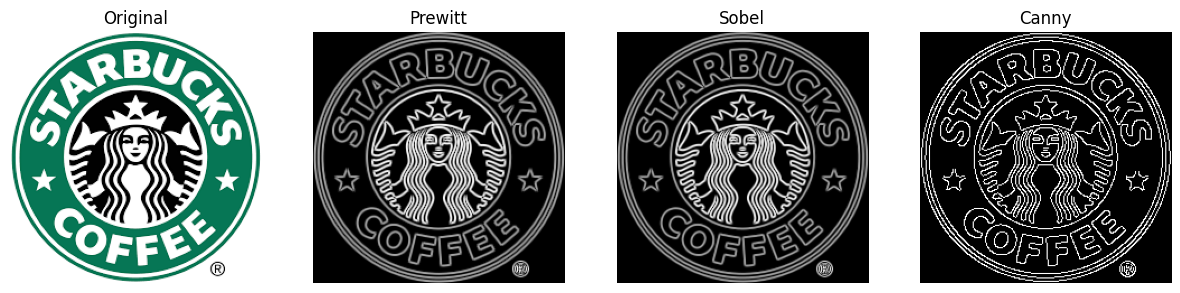

In [26]:
import warnings
warnings.filterwarnings("ignore")

"""Your Solution"""

# loading image
original_logo = io.imread('images_notebook/logo.png')

# we need 2d image so we convert it to rgb and then to grayscale
# rgba(original 4d) -> rgb(3d) -> grayscale(2d)
logo = rgba2rgb(original_logo)
logo = rgb2gray(logo)

# We call each flter and get the results
logo_prewitt = filters.prewitt(logo)
logo_sobel = filters.sobel(logo)
# Canny needs sigma value because uses a Gaussian filter
logo_canny = feature.canny(logo, sigma=.5)

# We put all the results in an array and call our 'show_images_edges' function to display them
titles = ['Original', 'Prewitt', 'Sobel', 'Canny']
logos = [original_logo,  logo_prewitt, logo_sobel, logo_canny]

# showing the three images
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(4 ,4,1)
ax.title.set_text(titles[0])
plt.axis('off')
plt.imshow(logos[0], cmap = 'gray')

ax = fig.add_subplot(4 ,4,2)
ax.title.set_text(titles[1])
plt.axis('off')
plt.imshow(logos[1], cmap = 'gray')

ax = fig.add_subplot(4, 4,3)
ax.title.set_text(titles[2])
plt.axis('off')
plt.imshow(logos[2], cmap = 'gray')

ax = fig.add_subplot(4, 4,4)
ax.title.set_text(titles[3])
plt.axis('off')
plt.imshow(logos[3], cmap = 'gray')

plt.show()


b)	Repeat the experiment with other images, you can use the ones included in the folder **images**. Comment if some parameter needs to be changed for the different images.

#### **Questions**

- Are the contours improved if the image is previously smoothed?
    - Yes, smoothing can reduce noise, leading to clearer and more consistent contours, especially with techniques sensitive to noise like Prewitt or Sobel. </p>

- Which are the limitations of the different images contour extraction?
    -  Prewitt: Sensitive to noise, may not capture subtle edges.
    -  Sobel: Better than Prewitt, but still can be affected by noise.
    -  Canny: Requires parameter tuning (like threshold values) and might over-process or miss edges if parameters aren't set appropriately.

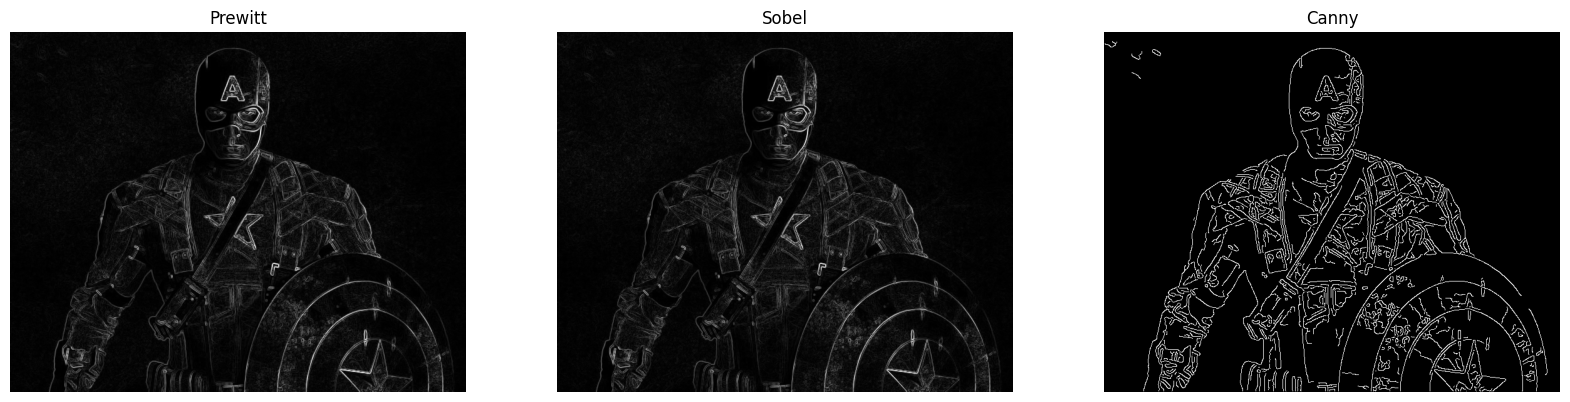

In [28]:
#your solution
# We read the capitain america (ca from now on) RGB image
ca = io.imread('images_notebook/Capitain_America.jpg')

# We convert it to gray, as these tecniques use 2-D images
ca_2d = rgb2gray(ca)

# We call each flter and get their results
res_prewitt = filters.prewitt(ca_2d)
res_sobel = filters.sobel(ca_2d)
res_canny = feature.canny(ca_2d, sigma=1.5)

# We put all the results in an array and call our 'show_images_edges' function to display them
titles = ['Prewitt', 'Sobel', 'Canny']
imgs = [ res_prewitt,res_sobel,res_canny]
show_images_edges(imgs, titles)

c) How many different ways can the Sobel detector be applied? Apply it (in all possible ways), and visualize and compare the obtained results.


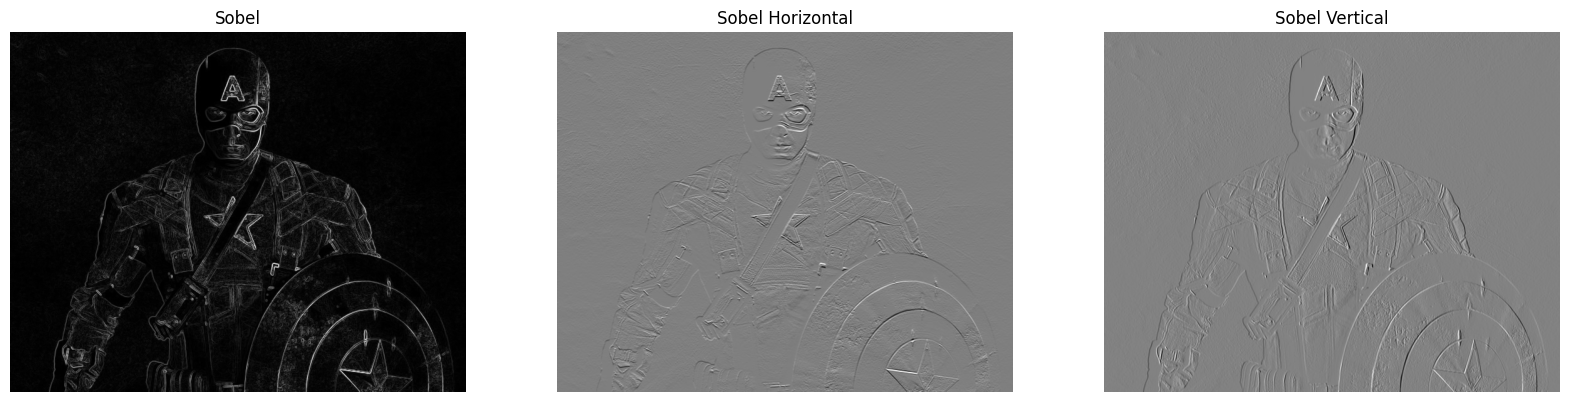

In [29]:
#your solution
# We try the three different Sobel types
res_sobel = filters.sobel(ca_2d)
res_sobel_h = filters.sobel_h(ca_2d)
res_sobel_v = filters.sobel_v(ca_2d)

# We put all results in an array and call a out function to display them
imgs = [res_sobel, res_sobel_h, res_sobel_v]
titles = ['Sobel', 'Sobel Horizontal', 'Sobel Vertical']

show_images_edges(imgs, titles)

### 2.6 Applying smoothing in order to obtain hybrid images

a) Given `./images_notebook/Capitain_America.jpg` and `./images_notebook/Ironman.jpg` images:

1. Plot both images.
2. Apply a low-pass filter to both of them and plot them.
3. Apply a high-pass filter to both of them and plot them.

The result should be something like:

<img src="images_notebook/Capitain.png" width="800" height="200">
<img src="images_notebook/Ironman.png" width="800" height="200">


By applying smoothing over an image I, we apply a `low-pass` filter. The resulting image can be called L(I). If we substract the filtered one from the original image, we obtain its high frequencies, that we can call H(I), i.e. we apply a `high-pass` filter. 

***H(I) = I - L(I)***

Hint: In order to highlight the effect, in the L(I) image you should define a lower sigma, while for the H(I) you should use a higher one. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


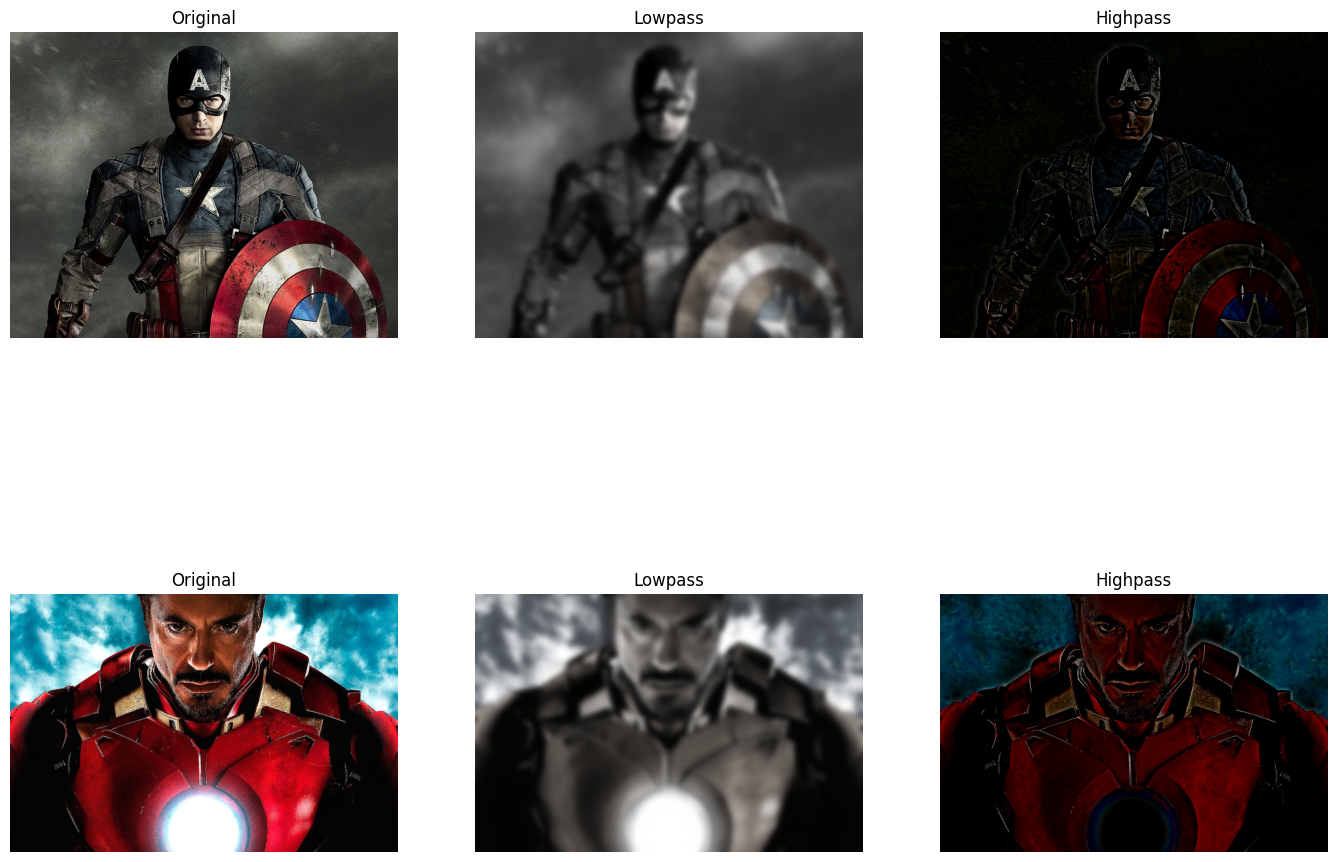

In [30]:
#your solution

from skimage import filters

# load images
capitain_america = io.imread('images_notebook/Capitain_America.jpg')
ironman = io.imread("images_notebook/Ironman.jpg")

# transform values into float
captain_america = img_as_float(capitain_america)
ironman = img_as_float(ironman)

# Apply a low-pass filter to both of them
# with sigma = 2.5 hybrid images give better results
ca_l = filters.gaussian(captain_america, sigma=5) # sigma = 1 by default
im_l = filters.gaussian(ironman, sigma=10) # sigma = 1 by default

ca_h = captain_america - ca_l
im_h = ironman - im_l

# display results
fig = plt.figure(figsize=(17,17))
plt.subplots_adjust(bottom=0.3)

fig.add_subplot(2,3,1)
plt.axis('off')
plt.title('Original')
plt.imshow(captain_america,cmap='gray')

fig.add_subplot(2,3,2)
plt.axis('off')
plt.title('Lowpass')
plt.imshow(ca_l,cmap='gray')

fig.add_subplot(2,3,3)
plt.axis('off')
plt.title('Highpass')
plt.imshow(ca_h,cmap='gray')

fig.add_subplot(2,3,4)
plt.axis('off')
plt.title('Original')
plt.imshow(ironman,cmap='gray')

fig.add_subplot(2,3,5)
plt.axis('off')
plt.title('Lowpass')
plt.imshow(im_l,cmap='gray')

fig.add_subplot(2,3,6)
plt.axis('off')
plt.title('Highpass')
plt.imshow(im_h,cmap='gray')

plt.show()

b) Create hybrid images and visualize them. A hybrid image is obtained by combining the low and high frequencies of the image, i.e. combining the results obtained by the `low-pass` and `high-pass` filters.

<img src="images_notebook/Fusion.gif" width="400" height="400">

Hybrid (I1, I2) = L(I1) + H(I2)

1. Analyze which is the best way of showing it if our aim is to see the Ironman face. 
2. Additionally, rescale the image to a different size and comment the results. 

Present the different visualizations of the experiment performed.

<img src="images_notebook/Hybrid.png" width="800" height="300">


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


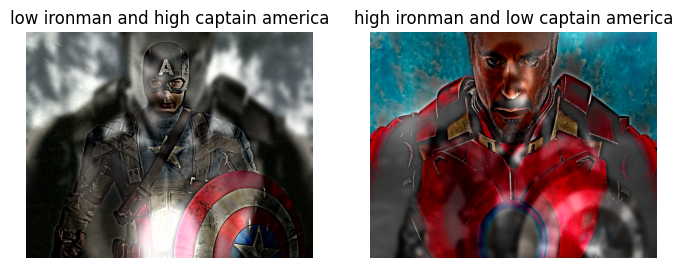

In [31]:
#your solution
# if we want to focus on ironman we should use ironman's lowpass filter and 
# ca's highpass filter as lowpass have more data than the higher one
# Highpass ca + Lowpass im

im_resize_l = resize(im_l, (ca_h.shape[0], ca_h.shape[1]), anti_aliasing=True)
im_resize_h = resize(im_h, (ca_l.shape[0], ca_l.shape[1]), anti_aliasing=True)

# Highpass ca + Lowpass im
hybrid_im = ca_h + im_resize_l
# Highpass im + Lowpass ca
hybrid_ca = im_resize_h + ca_l


fig = plt.figure(figsize=(17,17))
plt.subplots_adjust(bottom=0.3)
fig.add_subplot(1,4,2)
plt.axis('off')
plt.title('high ironman and low captain america')
plt.imshow(hybrid_ca,cmap='gray')
fig.add_subplot(1,4,1)
plt.axis('off')
plt.title("low ironman and high captain america")
plt.imshow(hybrid_im,cmap='gray')
plt.show()

### 2.7 Anonimization of videos

One of the important problems in Computer Vision as a science that manages data (images and videos) is the anonimization of persons appearing in them. Given the collection of images in the folder collectionbigbang, smooth the images in order to make unrecognizible the faces of the persons. Display sequentially the original and the anonimized images.

Help: 

- In order to read all images from a sequence, check the type [ImageCollection](http://scikit-image.org/docs/0.7.0/api/skimage.io.collection.html).

- In order to animate a sequence of images, you can use the animation library of matplotlib (in particular, [FuncAnimation](https://matplotlib.org/api/animation_api.html). 

Note that the animation library does not work with matplotlib inline. You should use the nbagg plugin to visualize the sequence of images. To this purpose, write before animation the following line:
% matplotlib nbagg

Note: you only need to run and understand the following code and substitute the video frames with their smoothed version, you do not need to implement anything else.

In [23]:
""""Showing one video per annimation"""

from skimage import io
import numpy as np
from skimage import transform
from matplotlib import pyplot as plt
import matplotlib.animation as animation

ic = io.ImageCollection('./images_notebook/bigbangcollection/*.png')

# Rescale to half of their size
scale=0.5
frames = len(ic)
height=np.int64((ic[0].shape[0])*scale)
width=np.int64((ic[0].shape[1])*scale)

print('Info about the animation:')
print('Num Frames:' + str(frames))
print('Images height:' + str(height))
print('Images width:' + str(width))

# create variable with dimensions of images by the number of frames
ic_small=np.ndarray(shape=(height,width,3,frames))

# combine them in ic_small variable
for i in range(frames):
        ic_small[:,:,:,i]=transform.rescale(ic[i],scale, channel_axis=-1)
        
print('The variable ic_small contains all rescaled images. Its shape is: ' + str(ic_small.shape))

%matplotlib nbagg

def updatefig1(i): 
    im.set_array(ic_small[:,:,:,i]) #showing the small image
    plt.draw()
    return im,

fig = plt.figure()
im = plt.imshow(ic_small[:,:,:,0])
ani = animation.FuncAnimation(fig, updatefig1, interval=2, blit=True, frames=len(ic), repeat= False)
# ani.save('animation.gif', fps=30)
# uncomment last line to save animation. re-run next markdown if you can't see the animation
plt.show()

Info about the animation:
Num Frames:200
Images height:180
Images width:320
The variable ic_small contains all rescaled images. Its shape is: (180, 320, 3, 200)


<IPython.core.display.Javascript object>

MovieWriter ffmpeg unavailable; using Pillow instead.


<img src="animation.gif" width="400" height="400">

In [24]:
%matplotlib nbagg 
from matplotlib import pyplot as plt, animation as anim
from skimage import io

bigbang_images = io.collection.ImageCollection('./images_notebook/bigbangcollection/*.png')
total_film_frames = len(bigbang_images)

#generates the next frame
def frame_update(frame_num) :
    act_img.set_array(bigbang_images[frame_num])
    return act_img

#visualize the video using FuncAnimation
fig = plt.figure()
act_img = plt.imshow(bigbang_images[0], animated = True)
ani = anim.FuncAnimation(fig, frame_update, frames = total_film_frames, interval = 20, repeat = False)
# ani.save('animation.gif', fps=30)
# uncomment last line to save animation
plt.show()

<IPython.core.display.Javascript object>

In [25]:
import warnings
warnings.filterwarnings("ignore")